## Loading the data

In this step, I first configure the folder used with the audio recordings (wav files), then I map the emotions to numbers, approach suitable for machine learning. Then, from the file names, I extract actor id, sentence id, emotion and emotion level. I create these columns as well as file name, file path, duration in seconds, sample rate and number of samples columns. The num_samples and sample_rate are added to verify audio consistency and analyze clip duration during EDA. I will use them only for data validation, not for modelling.

In [2]:
import os
import glob
import librosa
import pandas as pd
import numpy as np

C:\Users\User\AppData\Local\Temp\ipykernel_16832\16667646.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
# configuring the folder used
AUDIO_DIR = "AudioWAV"

# mapping emotions to integers
EMOTION_MAP = {
    "ANG": 0,
    "DIS": 1,
    "FEA": 2,
    "HAP": 3,
    "NEU": 4,
    "SAD": 5
}

rows = []

# loading audio files
wav_files = glob.glob(os.path.join(AUDIO_DIR, "*.wav"))
print(f"Found {len(wav_files)} WAV files")

for wav_path in wav_files:
    file_name = os.path.basename(wav_path)

    # splitting the parts of the file name
    name_parts = file_name.replace(".wav", "").split("_")

    if len(name_parts) != 4:
        print(f"Skipping malformed filename: {file_name}")
        continue

    actor_id, sentence_id, emotion, emotion_level = name_parts

    # loading audio metadata
    y, sr = librosa.load(wav_path, sr=None)
    duration_sec = len(y) / sr

 # assigning info to the rows
    rows.append({
        "file_name": file_name,
        "file_path": wav_path,
        "actor_id": int(actor_id),
        "sentence_id": sentence_id,
        "emotion": emotion,
        "emotion_id": EMOTION_MAP.get(emotion, -1),
        "emotion_level": emotion_level,
        "duration_sec": round(duration_sec, 3),
        "sample_rate": sr,
        "num_samples": len(y)
    })

# building the dataframe
df = pd.DataFrame(rows)

# sorting
df = df.sort_values(
    by=["emotion", "actor_id", "sentence_id"],
    ignore_index=True
)

# displaying the table
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_11816\1461892217.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Found 7442 WAV files


,file_name,file_path,actor_id,sentence_id,emotion,emotion_id,emotion_level,duration_sec,sample_rate,num_samples
0,1001_DFA_ANG_XX.wav,AudioWAV\1001_DFA_ANG_XX.wav,1001,DFA,ANG,0,XX,2.276,16000,36409
1,1001_IEO_ANG_HI.wav,AudioWAV\1001_IEO_ANG_HI.wav,1001,IEO,ANG,0,HI,1.935,16000,30964
2,1001_IEO_ANG_LO.wav,AudioWAV\1001_IEO_ANG_LO.wav,1001,IEO,ANG,0,LO,2.069,16000,33100
3,1001_IEO_ANG_MD.wav,AudioWAV\1001_IEO_ANG_MD.wav,1001,IEO,ANG,0,MD,2.636,16000,42175
4,1001_IOM_ANG_XX.wav,AudioWAV\1001_IOM_ANG_XX.wav,1001,IOM,ANG,0,XX,2.135,16000,34167


## Exporting the dataframe to a CSV file for easier access

In [3]:
df.to_csv("crema_d_dataset.csv", index=False)


# EDA (Exploratory Data Analysis)

## Unique counts in the dataset

In [6]:
n_clips = len(df)
n_emotions = df["emotion"].nunique()
n_actors = df["actor_id"].nunique()
n_sentences = df["sentence_id"].nunique()


print(f"Total clips: {n_clips}")
print(f"Emotion classes: {n_emotions}")
print(f"Actors: {n_actors}")
print(f"Sentences: {n_sentences}")


Total clips: 7442
Emotion classes: 6
Actors: 91
Sentences: 12


The dataset contains **7442** audio clips from **91** different actors reading **12** different sentences and expressing **6** different emotions.

## Emotion label distribution

In [6]:
emotion_counts = df["emotion"].value_counts().sort_index()
emotion_counts


emotion
ANG    1271
DIS    1271
FEA    1271
HAP    1271
NEU    1087
SAD    1271
Name: count, dtype: int64

There is equal count of all of the emotion labels (1271) with the exception for neutral (1087).

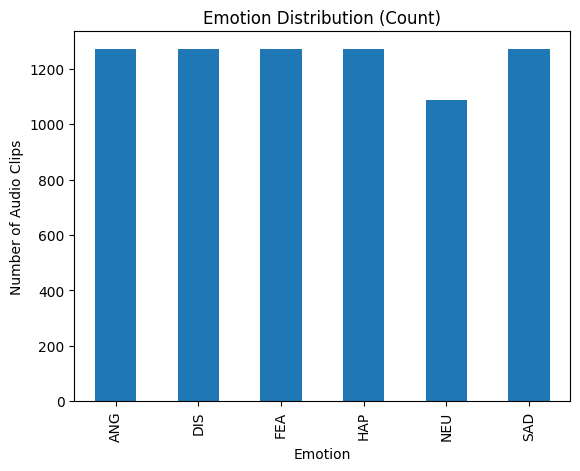

In [9]:
import matplotlib.pyplot as plt

emotion_counts.plot(kind="bar")
plt.title("Emotion Distribution (Count)")
plt.xlabel("Emotion")
plt.ylabel("Number of Audio Clips")
plt.show()


The conclusion is that the dataset is balanced, having equal amount of representatives for all emotions (1271), with a bit less for neutral (1087).

## Emotion Level Distribution

In [2]:
emotion_counts = df["emotion_level"].value_counts().sort_index()
emotion_counts


emotion_level
HI     455
LO     455
MD     455
X        1
XX    6076
Name: count, dtype: int64

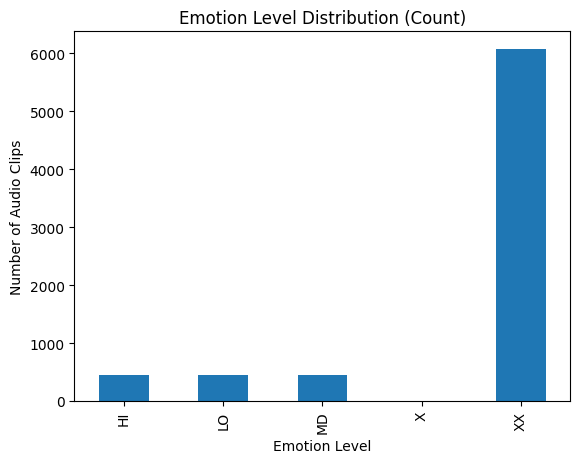

In [3]:
import matplotlib.pyplot as plt

emotion_counts.plot(kind="bar")
plt.title("Emotion Level Distribution (Count)")
plt.xlabel("Emotion Level")
plt.ylabel("Number of Audio Clips")
plt.show()


In [4]:
sentence_emotion_levels = (
    df
    .groupby(["sentence_id", "emotion_level"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

sentence_emotion_levels


emotion_level,HI,LO,MD,X,XX
sentence_id,,,,,
DFA,0,0,0,0,546
IEO,455,455,455,0,91
IOM,0,0,0,0,546
ITH,0,0,0,1,539
ITS,0,0,0,0,545
IWL,0,0,0,0,546
IWW,0,0,0,0,546
MTI,0,0,0,0,540
TAI,0,0,0,0,546


Emotion intensity annotations (LO/MD/HI) are sparsely available in CREMA-D and are concentrated primarily in the “It's eleven o'clock” sentence. Since most samples across other sentences are labeled as unspecified (XX), I will not use emotion intensity in this project.

“X” is just a rare annotation error indicating a missing value, not a true emotion intensity label.

## Audio duration analysis

In [10]:
df["duration_sec"].describe()


count    7442.000000
mean        2.542855
std         0.505968
min         1.268000
25%         2.202000
50%         2.502000
75%         2.836000
max         5.005000
Name: duration_sec, dtype: float64

Audio clip durations range from 1.27 to 5.01 seconds, with a mean duration of approximately 2.54 seconds and a median of 2.50 seconds. The majority of clips fall within a narrow range around the mean, indicating consistent recording lengths. This supports the use of a fixed-length input representation for model training. There is no evidence of corrupt or zero-length audios.

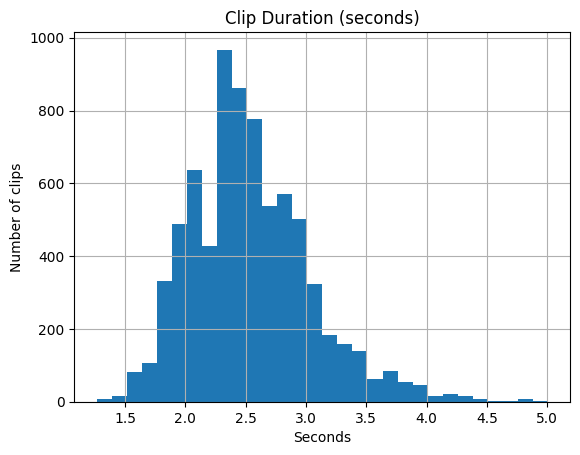

In [11]:
df["duration_sec"].hist(bins=30)
plt.title("Clip Duration (seconds)")
plt.xlabel("Seconds")
plt.ylabel("Number of clips")
plt.show()


The majority of clips are concentrated around 2.5 seconds, with a narrow spread and a small number of longer clips extending to approximately 5 seconds.

## Actor-level distribution

In [18]:
actor_counts = df.groupby("actor_id").size()
actor_counts.describe()


count    91.000000
mean     81.780220
std       1.083228
min      76.000000
25%      82.000000
50%      82.000000
75%      82.000000
max      82.000000
dtype: float64

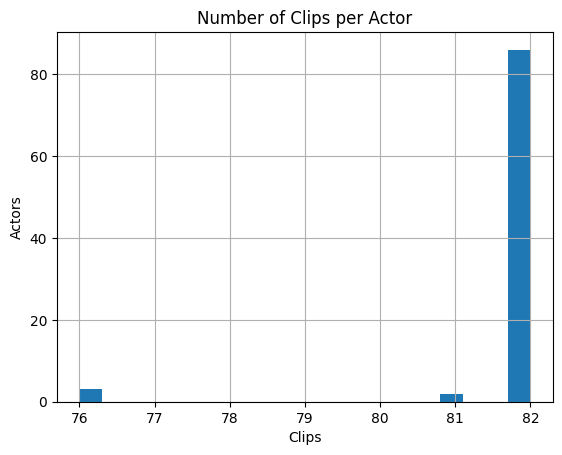

In [19]:
actor_counts.hist(bins=20)
plt.title("Number of Clips per Actor")
plt.xlabel("Clips")
plt.ylabel("Actors")
plt.show()


The dataset contains data from 91 actors with approximately 82 recordings per speaker, with a very little variation between them.


The number of clips per actor varies because not all actors recorded every sentence–emotion–intensity combination. Some recordings were skipped, inconsistent or removed during dataset processing. As a result, CREMA-D naturally contains an unbalanced number of samples per actor.

## Sentence distribution

In [13]:
sentence_counts = df["sentence_id"].value_counts().sort_index()
sentence_counts


sentence_id
DFA     546
IEO    1456
IOM     546
ITH     540
ITS     545
IWL     546
IWW     546
MTI     540
TAI     546
TIE     545
TSI     546
WSI     540
Name: count, dtype: int64

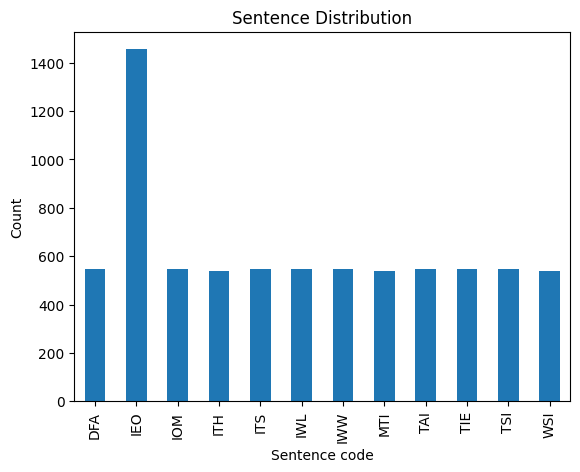

In [14]:
sentence_counts.plot(kind="bar")
plt.title("Sentence Distribution")
plt.xlabel("Sentence code")
plt.ylabel("Count")
plt.show()


The distribution shows that all sentences except IEO have roughly the same number of recordings (around 540–546 clips each), which indicates a well-balanced dataset across sentences. The only exception is IEO (“It’s eleven o’clock”), which has 1456 clips, significantly more than any other sentence.

This is expected in CREMA-D because IEO is the only sentence recorded with multiple controlled intensity levels (LO, MD, HI), resulting in many more variations. The remaining 11 sentences were recorded without intensity control and therefore appear only once per emotion per actor, giving them similar counts.

## Data Quality Checks

In [7]:
df.isna().sum()


file_name        0
file_path        0
actor_id         0
sentence_id      0
emotion          0
emotion_id       0
emotion_level    0
duration_sec     0
sample_rate      0
num_samples      0
dtype: int64

There are no missing values in the dataset.

In [16]:
df[df["emotion_id"] == -1]


,file_name,file_path,actor_id,sentence_id,emotion,emotion_id,emotion_level,duration_sec,sample_rate,num_samples


There are no invalid emotion IDs.

In [17]:
df["file_name"].duplicated().sum()


0

There are no duplicate file names.

## Checking for silent files

In [8]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm


def compute_audio_energy(path):

   # Returns average absolute amplitude (signal energy proxy).

    try:
        y, sr = librosa.load(path, sr=None)
        return np.mean(np.abs(y))
    except Exception as e:
        return None


def compute_silence_ratio(path, eps=1e-5):

    # Returns the ratio of samples close to zero.

    try:
        y, sr = librosa.load(path, sr=None)
        return np.mean(np.abs(y) < eps)
    except Exception as e:
        return None


# runnig silence check on whole dataset

results = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    path = row["file_path"]

    energy = compute_audio_energy(path)
    silence_ratio = compute_silence_ratio(path)

    results.append({
        "file_path": path,
        "energy": energy,
        "silence_ratio": silence_ratio
    })

silence_df = pd.DataFrame(results)

# defining silence criteria

ENERGY_THRESHOLD = 1e-4
SILENCE_RATIO_THRESHOLD = 0.98

silence_df["likely_silent"] = (
    (silence_df["energy"] < ENERGY_THRESHOLD) |
    (silence_df["silence_ratio"] > SILENCE_RATIO_THRESHOLD)
)

# summary

num_silent = silence_df["likely_silent"].sum()

print(f"Total audio files: {len(silence_df)}")
print(f"Likely silent files: {num_silent}")

# showing silent files if any
if num_silent > 0:
    display(
        silence_df[silence_df["likely_silent"]]
        .sort_values("energy")
        .head(10)
    )
else:
    print("No silent audio files detected ")


100%|██████████| 7442/7442 [02:13<00:00, 55.58it/s] 

Total audio files: 7442
Likely silent files: 1


,file_path,energy,silence_ratio,likely_silent
7227,AudioWAV\1076_MTI_SAD_XX.wav,0.0,1.0,True


One silent file was detected and after checking manually, it was indeed silent.

In [9]:
df = df[~df["file_path"].str.contains("1076_MTI_SAD_XX.wav", na=False)] \
       .reset_index(drop=True)


In [10]:
df[df["file_path"].str.contains("1076_MTI_SAD_XX", na=False)]


,file_name,file_path,actor_id,sentence_id,emotion,emotion_id,emotion_level,duration_sec,sample_rate,num_samples


In [11]:
print("Rows after removal:", len(df))


Rows after removal: 7441


In this step I remove and verify the successful removal of the silent file.

In [13]:
df.to_csv("crema_d_clean.csv", index=False)


In [ ]:
df = pd.read_csv("crema_d_clean.csv")


## EDA Conclusion

Exploratory data analysis of the CREMA-D audio dataset shows that the data is clean, well-structured and suitable for audio-based emotion recognition. The dataset contains 7,442 speech recordings from 91 actors, with a nearly equal number of clips per speaker, reducing the risk of speaker bias.

The distribution of emotion classes is approximately balanced, ensuring that no single emotion dominates the dataset. Audio recordings have consistent properties, with most clips lasting around 2.5 seconds and using a 16 kHz sampling rate, which supports the use of a fixed-length audio representation. The sentence distribution reflects the experimental design of the dataset and does not introduce issues for the emotion classification task. There was one silent file, which I removed.

Overall, the dataset shows no significant inconsistencies, missing values or extreme outliers. Based on these findings, the CREMA-D audio data is appropriate for building and evaluating an audio-only emotion recognition model.

## Creating Demo set
Before any modeling, I randomly selected a small demo set of 10 samples and
permanently will hold them out from all training, validation and test procedures.
These samples will not be used for model selection, hyperparameter tuning,
feature scaling or quantitative evaluation. After I choose the final model and make evaluation, the demo set will be used solely for demonstration of
the system's behavior on previously unseen audio clips.

In [12]:
np.random.seed(123)
demo_size = 10

n_samples   = len(df)
all_indices = np.arange(n_samples)

demo_indices = np.random.choice(all_indices, size=demo_size, replace=False)

demo_mask = np.zeros(n_samples, dtype=bool)
demo_mask[demo_indices] = True

df_demo      = df.iloc[demo_indices].reset_index(drop=True)
df_modelling = df.loc[~demo_mask].reset_index(drop=True)

print("Total samples:   ", len(df))
print("Demo samples:    ", len(df_demo))
print("Modelling samples:", len(df_modelling))

# saving demo data into CSV file
df_demo.to_csv("demo_metadata.csv", index=False)

df_modelling.to_csv("modelling_metadata.csv", index=False)


Total samples:    7441
Demo samples:     10
Modelling samples: 7431


In [ ]:
df_modelling = pd.read_csv("modelling_metadata.csv")


## Audio Preprocessing and Feature Extraction Setup

In [ ]:
import numpy as np
import pandas as pd
import librosa

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Global audio settings
SAMPLE_RATE = 16000
TARGET_DURATION = 3.0
TARGET_SAMPLES = int(SAMPLE_RATE * TARGET_DURATION)
N_MFCC = 13


In this section I define the global audio parameters and import the libraries needed for MFCC feature extraction and classical machine learning models. I will use 16kHz sample rate, 3 seconds target duration and MFCC features (13 coefficients, summarized by mean and standard deviation).


All audio clips are normalized to a 16 kHz sample rate and a fixed 3-second duration to ensure consistency and preserve all relevant speech information. A 16 kHz sampling rate is optimal for speech because emotional and linguistic information lies below 8 kHz, and CREMA-D’s processed files are already generated at 16 kHz. Normalizing clip length to 3 seconds avoids truncating meaningful audio while ensuring that feature extraction (MFCC mean and standard deviation) produces stable and comparable representations across all samples. Padding shorter clips is less harmful than truncation, making 3 seconds a safe and effective standardized duration.

## Loading and Normalizing Audio Length

In [15]:
def load_and_fix_length(path,
                        sample_rate=SAMPLE_RATE,
                        target_samples=TARGET_SAMPLES):

    # loading with original sample rate
    y, sr = librosa.load(path, sr=None)

    # resampling only if not already at desired sample rate
    if sr != sample_rate:
        y = librosa.resample(y, orig_sr=sr, target_sr=sample_rate)
        sr = sample_rate

    # padding or trimming to target length
    if len(y) < target_samples:
        pad_width = target_samples - len(y)
        y = np.pad(y, (0, pad_width), mode="constant")
    else:
        y = y[:target_samples]

    return y

Here I define a helper function that loads a WAV file, resamples it to 16kHz, pads or trims to a fixed duration of 3 seconds.

This ensures that all audio clips have the same length in samples (48 000 samples at 16kHz) which is required for a consistent feature extraction.

## MFCC Feature Extraction for One Audio Clip

In [16]:
def extract_mfcc_features(y,
                          sample_rate=SAMPLE_RATE,
                          n_mfcc=N_MFCC):

    mfcc = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=n_mfcc)

    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std  = np.std(mfcc, axis=1)

    features = np.concatenate([mfcc_mean, mfcc_std], axis=0)
    return features

# Sanity check using one audio file from the modelling set
test_row = df_modelling.iloc[0]
y_audio_test = load_and_fix_length(test_row["file_path"])

feat_test = extract_mfcc_features(y_audio_test)
feat_test.shape


(26,)

For each fixed-length audio signal, I extract MFCC features. I compute 13 MFCC coefficients over time and the mean and standard deviation of each coefficient.

This gives a fixed-length feature vector of size 26 (13 means + 13 standard deviations)
for each audio clip.

## MFCC Pipeline Explained

![](mfcc_diagram.png)

## Building Feature Matrix X and Label Vector y

I now loop over all rows in the df and normalize each audio file, extract MFCC features and collect `X`: feature matrix (n_samples × n_features), `y`: emotion labels (n_samples,), `actors`: actor IDs (n_samples,) for later speaker-independent splitting.

In [17]:
X_list = []
y_list = []
actor_list = []

for i, (_, row) in enumerate(df_modelling.iterrows(), start=1):
    path  = row["file_path"]
    label = row["emotion_id"]
    actor = row["actor_id"]

    y_audio = load_and_fix_length(path)
    features = extract_mfcc_features(y_audio)

    X_list.append(features)
    y_list.append(label)
    actor_list.append(actor)

    # progress print to track long runs
    if i % 500 == 0:
        print(f"Processed {i} files...")

X = np.vstack(X_list)
y = np.array(y_list)
actors = np.array(actor_list)

# sanity checks
print("Final shapes:")
print("X:", X.shape)
print("y:", y.shape)
print("actors:", actors.shape)


Processed 500 files...
Processed 1000 files...
Processed 1500 files...
Processed 2000 files...
Processed 2500 files...
Processed 3000 files...
Processed 3500 files...
Processed 4000 files...
Processed 4500 files...
Processed 5000 files...
Processed 5500 files...
Processed 6000 files...
Processed 6500 files...
Processed 7000 files...
Final shapes:
X: (7431, 26)
y: (7431,)
actors: (7431,)


In [18]:
np.save("X_mfcc.npy", X)
np.save("y_labels.npy", y)
np.save("actors.npy", actors)


I saved X, y and actors to .npy so I don't have to recompute features from all audio files again.

In [22]:
import numpy as np
import pandas as pd

X = np.load("X_mfcc.npy")
y = np.load("y_labels.npy")
actors = np.load("actors.npy")

# creating column names for MFCC features
n_features = X.shape[1]

if n_features % 2 != 0:
    raise ValueError(f"Expected even number of features (mean+std), got {n_features}")

n_mfcc = n_features // 2

mfcc_columns = (
    [f"mfcc{i+1}_mean" for i in range(n_mfcc)] +
    [f"mfcc{i+1}_std"  for i in range(n_mfcc)]
)

# building dataframe from X
X_df = pd.DataFrame(X, columns=mfcc_columns)

# adding labels and actor IDs
X_df["emotion_id"] = y
X_df["actor_id"] = actors

# showing basic info and first few rows
display(X_df.head())
print("\nShape:", X_df.shape)


,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,...,mfcc6_std,mfcc7_std,mfcc8_std,mfcc9_std,mfcc10_std,mfcc11_std,mfcc12_std,mfcc13_std,emotion_id,actor_id
0,-380.867218,71.632561,6.943796,18.635712,5.929990,-4.268384,-9.042735,-7.445445,-3.152368,-10.320556,...,16.065624,14.665763,14.682981,6.231073,8.644651,6.626313,8.041101,6.122510,0,1001
1,-385.222656,60.933475,3.202650,7.320065,-5.282083,0.450195,-4.912608,-7.466516,-3.260267,-9.956572,...,10.972527,12.867491,15.242420,6.879730,11.271752,9.438791,9.295377,7.422728,0,1001
2,-469.396179,76.954109,9.073170,16.176121,5.087040,1.389688,-3.173029,-3.790012,-2.643498,-8.680919,...,5.621234,8.408354,11.684646,6.943314,7.040093,9.650768,8.421950,6.246035,0,1001
3,-380.442749,95.826546,9.489100,16.418568,0.948692,2.587453,-5.216271,-11.951965,-3.459251,-9.794499,...,10.459950,10.261590,17.260105,7.150342,9.924994,13.397016,8.292521,6.919485,0,1001
4,-420.074768,72.305443,5.456783,25.261059,5.929327,-2.997007,-3.025796,-7.293969,-4.159785,-9.992061,...,10.705394,7.764814,10.973930,9.003323,11.157715,6.997446,7.420118,7.551198,0,1001



Shape: (7431, 28)


## Feature Matrix Inspection

After extracting MFCC-based features from the audio recordings, the resulting
dataset is represented numerically as a feature matrix **X** and a label vector **y**.
These arrays are combined into a single
tabular representation.

Each row in the table corresponds to one audio clip, while each column
represents a numerical feature derived from the clip. Specifically, the features
consist of the mean and standard deviation of 13 MFCC coefficients, computed
across the duration of each audio recording. This results in a total of 26
features per clip.

An additional column contains the **emotion label (`emotion_id`)**, which is the target variable for classification. The **actor ID (`actor_id`)** is also
included to enable speaker-independent splitting of the data into training,
validation and test sets.




## What are MFCCs?

MFCCs (Mel-Frequency Cepstral Coefficients) are widely used features in speech
processing that represent the short-term spectral characteristics of audio in a
perceptually meaningful way. They are computed by mapping the frequency spectrum
onto the mel scale, applying logarithmic compression and decorrelating the result
using a discrete cosine transform.

In this project, 13 MFCC coefficients were extracted from each audio recording.
To obtain a fixed-length representation suitable for classical machine-learning
models, the mean and standard deviation of each coefficient were computed across
time, resulting in a 26-dimensional feature vector per audio clip.


## Why are the mean and standard deviation of the MFCCs?
Raw MFCC features are computed over short overlapping frames, producing a
time-dependent representation of variable length. To obtain a fixed-length
feature vector suitable for classical machine-learning models, statistical
pooling was applied by computing the mean and standard deviation of each MFCC
coefficient across time.

The mean captures the average spectral characteristics of the speech signal,
while the standard deviation captures temporal variability and expressiveness,
both of which are strongly related to emotional content.


## How are the coefficients different across emotions?

Different emotions exhibit distinct patterns in MFCC statistics. Emotions such as
anger and fear show higher MFCC means and greater standard deviations, reflecting
increased vocal effort and instability, while sadness exhibits lower means and
reduced variability corresponding to flat and low-energy speech. These statistical
differences allow emotions to form distinguishable regions in MFCC feature space.


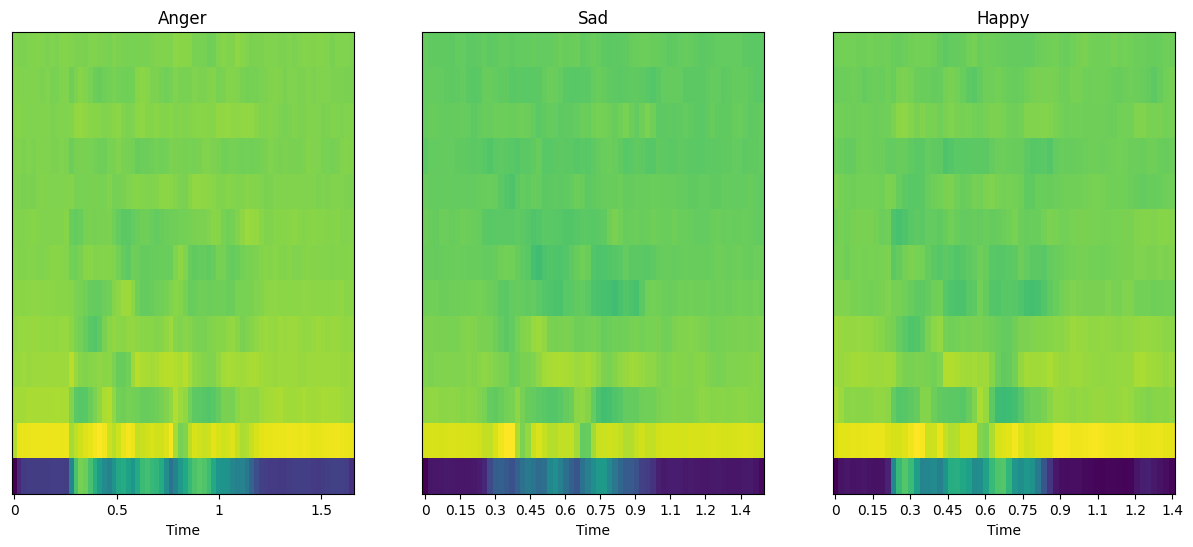

In [20]:
emotion_files = {
    "Anger":  df[df.emotion=="ANG"].iloc[0]["file_path"],
    "Sad":    df[df.emotion=="SAD"].iloc[0]["file_path"],
    "Happy":  df[df.emotion=="HAP"].iloc[0]["file_path"],
}

plt.figure(figsize=(15, 6))

for idx, (emo, path) in enumerate(emotion_files.items()):
    y, sr = librosa.load(path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.subplot(1, 3, idx+1)
    librosa.display.specshow(mfcc, x_axis='time', cmap="viridis")
    plt.title(emo)

plt.show()


The MFCC heatmaps show broadly similar spectral patterns across emotions, with subtle differences in energy distribution and temporal variability. This highlights the challenge of speech emotion recognition and explains why emotion-related information is captured statistically rather than through visually obvious patterns in individual samples.

In the MFCC heatmaps, color intensity represents the magnitude of each MFCC coefficient at a given time frame, with brighter colors indicating higher coefficient values and darker colors indicating lower values.

## Loading features for modelling

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load modelling features (demo samples are not included here)
X = np.load("X_mfcc.npy")
y = np.load("y_labels.npy")
actors = np.load("actors.npy")

print("X:", X.shape)
print("y:", y.shape)
print("actors:", actors.shape)


X: (7431, 26)
y: (7431,)
actors: (7431,)


## Splitting into Train/Validation/Test (by actor)

In [3]:
# Unique actors in the modelling set
unique_actors = np.unique(actors)
print("Total actors (modelling):", len(unique_actors))

actors_train, actors_temp = train_test_split(
    unique_actors,
    test_size=0.3,
    random_state=42
)

actors_val, actors_test = train_test_split(
    actors_temp,
    test_size=0.5,
    random_state=42
)

print("Train actors:", len(actors_train))
print("Val actors:  ", len(actors_val))
print("Test actors: ", len(actors_test))

# Masks for each split
train_mask = np.isin(actors, actors_train)
val_mask   = np.isin(actors, actors_val)
test_mask  = np.isin(actors, actors_test)

X_train, y_train = X[train_mask], y[train_mask]
X_val,   y_val   = X[val_mask],   y[val_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_val:  ", X_val.shape,   " y_val:  ", y_val.shape)
print("X_test: ", X_test.shape,  " y_test: ", y_test.shape)


Total actors (modelling): 91
Train actors: 63
Val actors:   14
Test actors:  14
X_train: (5143, 26)  y_train: (5143,)
X_val:   (1141, 26)  y_val:   (1141,)
X_test:  (1147, 26)  y_test:  (1147,)


To prevent speaker leakage and ensure that the model learns emotion-related
acoustic patterns rather than speaker identity, I split the dataset by actor.
All samples from a given actor appear in only one of the train, validation or
test sets. This setup evaluates the model’s ability to generalize to previously
unseen speakers, which is essential for realistic speech emotion recognition.


A separate validation set is required so that model tuning and hyperparameter selection do not contaminate the final test results. The test set must remain untouched until the very end so it provides a completely unbiased measure of real-world performance.

## Scaling features for the SVM and kNN models

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


Feature scaling was applied using standardization (zero mean and unit variance)
to ensure that all MFCC features contribute equally during model training.
This step is essential for distance-based and margin-based classifiers such as
k-nearest neighbors and support vector machines.


## kNN model


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# training kNN
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_scaled, y_train)

# validation performance
y_val_pred_knn = knn.predict(X_val_scaled)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)

print("kNN – Validation Accuracy:", round(val_acc_knn, 4))


# test performance
y_test_pred_knn = knn.predict(X_test_scaled)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

print("\nkNN – Test Accuracy:", round(test_acc_knn, 4))
print("\nkNN – Test Classification Report:")
print(classification_report(y_test, y_test_pred_knn))


kNN – Validation Accuracy: 0.4479

kNN – Test Accuracy: 0.4289

kNN – Test Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       196
           1       0.33      0.18      0.23       196
           2       0.36      0.08      0.13       196
           3       0.33      0.37      0.35       195
           4       0.37      0.54      0.44       168
           5       0.48      0.68      0.56       196

    accuracy                           0.43      1147
   macro avg       0.41      0.43      0.39      1147
weighted avg       0.41      0.43      0.39      1147



The kNN model achieved ~0.45 validation accuracy and ~0.43 test accuracy, which is typical for MFCC-based classical machine-learning baselines on CREMA-D. Some emotions with strong vocal cues (e.g., class 0 and 5) are recognized relatively well, while more subtle emotions (1, 2, 3) are harder to classify. The drop from validation to test accuracy is expected due to strict speaker-independent evaluation. Overall, kNN captures basic emotional patterns but is limited by the simplicity of the MFCC mean/std features.

## Random Forest Model

### Finding the best number of trees

In [6]:
from sklearn.metrics import accuracy_score
import numpy as np

tree_values = [50, 100, 200, 300, 400, 500, 700, 1000]

val_accuracies = []

for t in tree_values:
    rf = RandomForestClassifier(
        n_estimators=t,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)

    y_val_pred = rf.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)

    print(f"{t} trees → Validation Accuracy: {acc:.4f}")


50 trees → Validation Accuracy: 0.4715
100 trees → Validation Accuracy: 0.4785
200 trees → Validation Accuracy: 0.4759
300 trees → Validation Accuracy: 0.4864
400 trees → Validation Accuracy: 0.4908
500 trees → Validation Accuracy: 0.4969
700 trees → Validation Accuracy: 0.4987
1000 trees → Validation Accuracy: 0.5013


### Visualising the different accuracies 

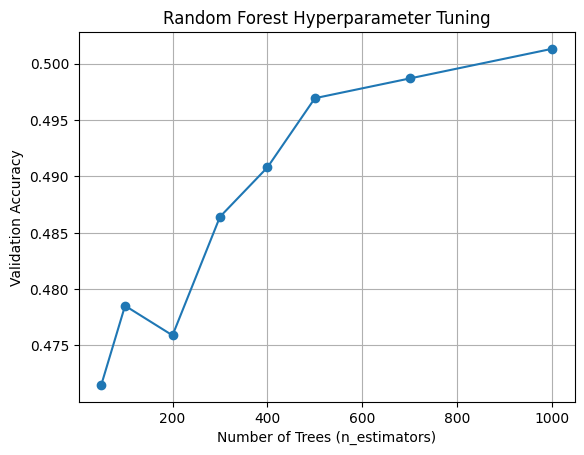

In [9]:
import matplotlib.pyplot as plt

plt.plot(tree_values, val_accuracies, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation Accuracy")
plt.title("Random Forest Hyperparameter Tuning")
plt.grid(True)
plt.show()


Increasing the number of trees improves performance, but not too noticeably. Validation accuracy rises steadily until around 500–700 trees, and the maximum is reached at 1000 trees. Since the improvement is small after 500 trees, both 500 and 1000 trees are reasonable choices depending on whether speed or maximum accuracy is preferred.

In [8]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

# validation performance
y_val_pred = rf.predict(X_val_scaled)
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", round(val_acc, 3))

# test performance
y_test_pred = rf.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", round(test_acc, 3))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.497
Test Accuracy: 0.434

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       196
           1       0.32      0.23      0.27       196
           2       0.52      0.12      0.20       196
           3       0.31      0.44      0.36       195
           4       0.42      0.42      0.42       168
           5       0.49      0.65      0.56       196

    accuracy                           0.43      1147
   macro avg       0.44      0.43      0.41      1147
weighted avg       0.44      0.43      0.41      1147



The Random Forest model achieved ~50% validation accuracy and ~43% test accuracy. Performance is consistent with classical ML baselines on CREMA-D when using MFCC mean and standard deviation features. Some emotions such as class 0 and 5 were recognized relatively well, while others (1 and 2) were more challenging. The drop in test accuracy is expected because actor-based splitting ensures the test speakers are completely unseen, making the evaluation more realistic. Overall, the model captures some emotional patterns but is limited by the simplicity of MFCC summary features and the complexity of speech emotion recognition.

## SVM Model

### Hyperparameter on validation set

In [16]:
C_values = [0.1, 1, 10]
gamma_values = ["scale", 0.01, 0.001]

best_val_acc = 0.0
best_params = None
best_model = None

for C in C_values:
    for gamma in gamma_values:
        svm_tmp = SVC(
            kernel="rbf",
            C=C,
            gamma=gamma,
            random_state=42
        )
        svm_tmp.fit(X_train_scaled, y_train)
        y_val_pred = svm_tmp.predict(X_val_scaled)
        acc = accuracy_score(y_val, y_val_pred)
        print(f"C={C}, gamma={gamma} - val acc = {acc:.4f}")

        if acc > best_val_acc:
            best_val_acc = acc
            best_params = (C, gamma)
            best_model = svm_tmp

print("\nBest params from validation:")
print("C =", best_params[0], " gamma =", best_params[1])
print("Best validation accuracy:", round(best_val_acc, 4))


C=0.1, gamma=scale - val acc = 0.4706
C=0.1, gamma=0.01 - val acc = 0.4610
C=0.1, gamma=0.001 - val acc = 0.4005
C=1, gamma=scale - val acc = 0.4899
C=1, gamma=0.01 - val acc = 0.4777
C=1, gamma=0.001 - val acc = 0.4680
C=10, gamma=scale - val acc = 0.4864
C=10, gamma=0.01 - val acc = 0.4864
C=10, gamma=0.001 - val acc = 0.4724

Best params from validation:
C = 1  gamma = scale
Best validation accuracy: 0.4899


Smaller values of C caused the model to underfit, while very small gamma values produced overly smooth decision boundaries that reduced accuracy. Increasing C did not offer additional benefits and sometimes decreased performance.

Overall, the SVM with C = 1 and gamma = "scale" provided the best trade-off between model complexity and generalization, making it the strongest classical baseline model in this project compared to kNN and Random Forest.

C=1 - gives balanced margin - it is not too strict or too loose

gamma - gives a reasonable level of curvature in the boundary

### Training the model

In [9]:
svm = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    random_state=42
)

svm.fit(X_train_scaled, y_train)

# validation performance
y_val_pred_svm = svm.predict(X_val_scaled)
val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
print("SVM – Validation Accuracy:", round(val_acc_svm, 4))

# test performance
y_test_pred_svm = svm.predict(X_test_scaled)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print("\nSVM – Test Accuracy:", round(test_acc_svm, 4))
print("\nSVM – Test Classification Report:")
print(classification_report(y_test, y_test_pred_svm))



SVM – Validation Accuracy: 0.4899

SVM – Test Accuracy: 0.4595

SVM – Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       196
           1       0.35      0.29      0.32       196
           2       0.53      0.24      0.33       196
           3       0.34      0.43      0.38       195
           4       0.45      0.45      0.45       168
           5       0.48      0.65      0.55       196

    accuracy                           0.46      1147
   macro avg       0.46      0.46      0.45      1147
weighted avg       0.46      0.46      0.45      1147



The SVM model offers the strongest generalization among the classical models tested, achieving ~46% test accuracy. It consistently performs well on the more distinctive emotions (classes 0 and 5), while more subtle or acoustically similar emotions remain challenging. These results highlight that MFCC-based classical models can capture broad emotional differences but may require more expressive features or deep learning architectures for finer emotional discrimination.

## Comparing the classification performance across the models for every emotion

In [10]:
# kNN
report_knn = classification_report(
    y_test, y_test_pred_knn, output_dict=True
)

# Random Forest
report_rf = classification_report(
    y_test, y_test_pred, output_dict=True
)

# SVM
report_svm = classification_report(
    y_test, y_test_pred_svm, output_dict=True
)


In [12]:
EMOTION_MAP_REV = {
    0: "Anger",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Neutral",
    5: "Sad"
}

emotion_ids = sorted([int(k) for k in report_svm.keys() if k.isdigit()])

comparison_rows = []

for emo in emotion_ids:
    comparison_rows.append({
        "Emotion": EMOTION_MAP_REV[emo],
        "kNN_F1": report_knn[str(emo)]["f1-score"],
        "RF_F1":  report_rf[str(emo)]["f1-score"],
        "SVM_F1": report_svm[str(emo)]["f1-score"],
    })

df_f1_comparison = pd.DataFrame(comparison_rows)

df_f1_comparison


,Emotion,kNN_F1,RF_F1,SVM_F1
0,Anger,0.641256,0.647321,0.652381
1,Disgust,0.232558,0.271386,0.316384
2,Fear,0.132780,0.198347,0.334495
3,Happy,0.349282,0.361345,0.380952
4,Neutral,0.442822,0.416667,0.449102
5,Sad,0.561845,0.560706,0.554585


Emotions with strong acoustic cues such as Anger and Sad are easier to recognize, while Fear and Disgust remain difficult due to overlapping speech characteristics. SVM performs best across most emotions, particularly for subtle emotional states.

## Why SVM performs better than kNN and Random Forest?

**kNN** classifies a sample by measuring distance to all training samples and votes among the nearest neighbours but MFCCs space is highly overlapping across emotions and emotional differences are subtle and continuous.

**Random Forest** consists of an ensemble of decision trees trained on random subsets of data and features. Each tree learns a series of threshold-based rules on MFCC statistics to classify emotions, and the final prediction is made by majority voting. While Random Forest captures some nonlinear relationships, its axis-aligned splits and sensitivity to speaker-specific MFCC patterns limit its generalization to unseen speakers, resulting in lower test accuracy compared to SVM.

**SVM** looks at all samples together and finds the boundary that best separates emotions with the largest possible margin, making it more stable and generalizable.



## Overall Conclusion for Classical Models

In this project, three classical machine-learning models were evaluated using MFCC-based audio features: k-Nearest Neighbors (kNN), Random Forest, and Support Vector Machine (SVM).
I trained all models on standardized MFCC statistics (mean and standard deviation) and evaluated on completely unseen speakers to ensure fair generalization.

The overall performance of classical models remained in the 40–50% accuracy range, which is consistent with expectations for MFCC-based emotion recognition on CREMA-D.

 **kNN**

Achieved ~44% validation accuracy and ~43% test accuracy.

Performs reasonably well on clearly distinguishable emotions but struggles with subtle ones.

Sensitive to feature scaling and high variation in the dataset.

**Random Forest**

Showed slightly higher validation accuracy (~49%) but lower test accuracy (43%).

Indicates mild overfitting: performs well on training-like samples but generalizes less effectively.

Captures non-linear relationships better than kNN but remains limited by MFCC summary features.

**SVM (Best Model)**

Achieved the strongest results: ~49% validation accuracy and ~46% test accuracy.

Handles high-dimensional MFCC features more effectively than the other models.

Provides the best balance between fitting and generalizing to unseen speakers.

Performs well on more distinct emotions but still confuses acoustically similar ones.